In [6]:
import json
import numpy as np
import matplotlib.pyplot as plt
import astropy.table as table
from scipy.io.idl import readsav

def load_json_specs(fname):
    with open(fname, 'r') as f:
        data = json.load(f)
    sne = data[list(data.keys())[0]]
    specs = sne['spectra']
    #print(specs[1])
    ret_specs = []
    for spec in specs:
        if not 'time' in spec:
            continue
        t = spec['time']
        wave = np.array([float(x[0]) for x in spec['data']])
        flux = np.array([float(x[1]) for x in spec['data']])
        ret_specs.append({'time': float(t), 'wave': wave, 'flux': flux})
    return sorted(ret_specs, key=lambda x: x['time'])

def plotr(wave, flux, label, fudge=1.0, alpha=1.0):
    wave_idx = np.logical_and(wave > 4000, wave < 7000)
    mean_flux = np.nanmean(flux[wave_idx])
    plt.plot(wave, flux/mean_flux*fudge, label=label, alpha=alpha)

In [33]:
tgt_spec1 = table.Table.read('../products/specs/fluxcal/ZTF19abqwtfu_20190910_P60_v1.ascii', format='ascii')
tgt_spec2 = table.Table.read('../products/specs/fluxcal/ZTF19abqwtfu_20190922_P60_v1.ascii', format='ascii')
tgt_spec3 = table.Table.read('../products/specs/fluxcal/ZTF19abqwtfu_20191003_NOT_v1.ascii', format='ascii')


In [26]:
comp_specsIb = []
for day in ["-10", "-05", "00", "05", "10", "15", "20", "25"]:
    s = readsav("/home/welterde/mess/2021/12/SESNtemple/MeanSpec/meanspIb/AllSpectraPerSN/meanspecIb_%s.sav" % day)
    dwbin = s.wlog[1:1024]-s.wlog[0:1023] 
    dwbin = np.append(dwbin[0], dwbin) # array of bin sizes
    fnoflat = (s.fmean+1)*s.smean # flux per log lambda bin
    fnoflat_perA = fnoflat/dwbin # flux per angstrom
    #plt.plot(s.wlog,fnoflat_perA)
    comp_specsIb.append((day, s.wlog, fnoflat_perA))


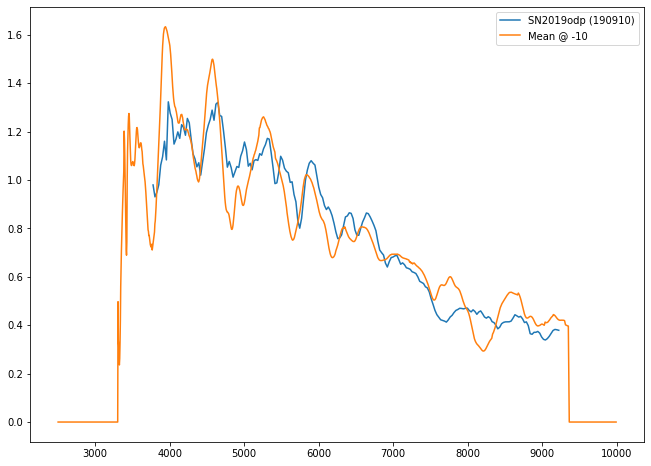

In [13]:
plt.figure(figsize=(11,8))
#plt.plot(tgt_spec1['wavelength'], tgt_spec1['flux'])
plotr(tgt_spec1['wavelength'], tgt_spec1['flux'], label="SN2019odp (190910)")
idx = 0
plotr(comp_specsIb[idx][1], comp_specsIb[idx][2], label="Mean @ " + comp_specsIb[idx][0])
#idx = 1
#plotr(comp_specsIb[idx][1], comp_specsIb[idx][2], label=comp_specsIb[idx][0])
plt.legend()

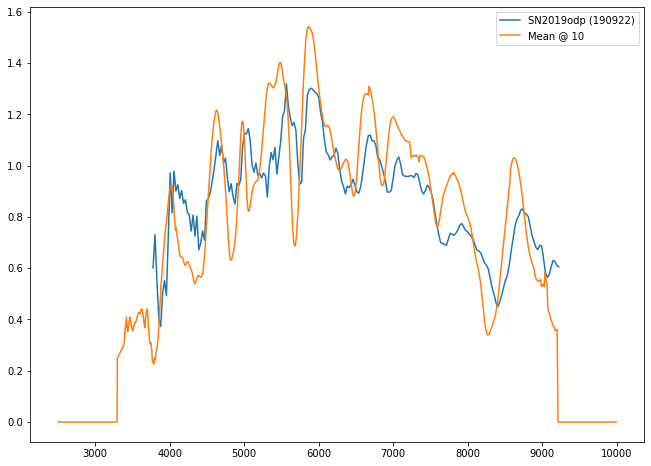

In [32]:
plt.figure(figsize=(11,8))
#plt.plot(tgt_spec1['wavelength'], tgt_spec1['flux'])
plotr(tgt_spec2['wavelength'], tgt_spec2['flux'], label="SN2019odp (190922)")
idx = 4
plotr(comp_specsIb[idx][1], comp_specsIb[idx][2], label="Mean @ " + comp_specsIb[idx][0])
#idx = 1
#plotr(comp_specsIb[idx][1], comp_specsIb[idx][2], label=comp_specsIb[idx][0])
plt.legend()

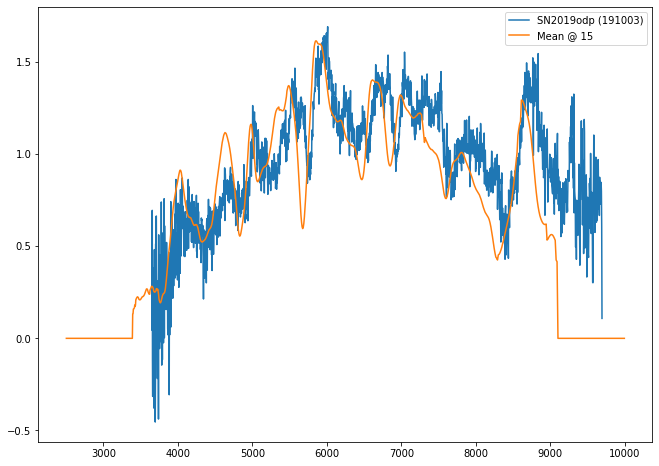

In [37]:
plt.figure(figsize=(11,8))
#plt.plot(tgt_spec1['wavelength'], tgt_spec1['flux'])
plotr(tgt_spec3['wavelength'], tgt_spec3['flux'], label="SN2019odp (191003)")
idx = 5
plotr(comp_specsIb[idx][1], comp_specsIb[idx][2], label="Mean @ " + comp_specsIb[idx][0])
#idx = 1
#plotr(comp_specsIb[idx][1], comp_specsIb[idx][2], label=comp_specsIb[idx][0])
plt.legend()